![IMDB Movie Analysis](https://trainity.link/img/data-project/IMDB.png)

# IMDB Movie Analysis

let's Delve into the realm of cinema, understanding the factors that shape a movie's success is a quest that holds immense significance for filmmakers, producers, and enthusiasts alike. This project delves into the intricate world of IMDb movie data to unveil the secrets behind high ratings. Through meticulous data analysis, we will unravel the impact of genres, durations, languages, directors, and budgets on the cherished measure of a movie's acclaim. Join us as we explore the art and science behind movie excellence.

# Project Description

IMDb registered users can cast a vote (from 1 to 10) on every releasedtitle in the database. Individual votes are then aggregated andsummarized as a single IMDb rating, this rating describes thepopularity of a movie in the public.The dataset contains only one csv file IMDB_Movies.csv has been used in this project for the analysis.The libraries for data analysis and visualization used in this project are Numpy & Pandas.

![Top IMDB Movies](https://writethroughthenight.files.wordpress.com/2022/08/imdb-top-50.png?w=1200)

In [1]:
project_name = "IMDB-Movie-Analysis"

In [2]:
!pip install jovian --upgrade -q

In [3]:
import jovian
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Creating a new project "nithinmodiboyana/IMDB-Movie-Analysis"
[jovian] Committed successfully! https://jovian.com/nithinmodiboyana/imdb-movie-analysis


'https://jovian.com/nithinmodiboyana/imdb-movie-analysis'

#### Importing Libraries
+ lets first quickly import the libraries which we are going to use in this project

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Importing Data

In [6]:
movies_df = pd.read_csv('IMDB_Movies.csv')

### Understanding the Raw DataSet

Understanding the raw dataset is a crucial preliminary step achieved through methods like checking its size, using the "info" and "describe" functions, and examining a few initial records. This process aids in comprehending the dataset's dimensions, variable types, and summary statistics. By assessing these aspects, we gain insights into the data's structure, potential issues like missing values or outliers, and an initial understanding of the variables' distributions. This forms the foundation for informed decision-making throughout the data analysis journey.

In [7]:
movies_df

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,Color,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,NaN,Comedy|Drama,...,6,English,Canada,NaN,NaN,2013.0,470.0,7.7,NaN,84
5039,Color,NaN,43.0,43.0,NaN,319.0,Valorie Curry,841.0,NaN,Crime|Drama|Mystery|Thriller,...,359,English,USA,TV-14,NaN,NaN,593.0,7.5,16.00,32000
5040,Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,NaN,Drama|Horror|Thriller,...,3,English,USA,NaN,1400.0,2013.0,0.0,6.3,NaN,16
5041,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Comedy|Drama|Romance,...,9,English,USA,PG-13,NaN,2012.0,719.0,6.3,2.35,660


In [8]:
movies_df.shape

(5043, 28)

In [10]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

In [11]:
movies_df.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,4993.000000,5028.000000,4939.000000,5020.000000,5036.000000,4.159000e+03,5.043000e+03,5043.000000,5030.000000,4.551000e+03,4935.000000,5030.000000,5043.000000,4714.000000,5043.000000
mean,140.194272,107.201074,686.509212,645.009761,6560.047061,4.846841e+07,8.366816e+04,9699.063851,1.371173,3.975262e+07,2002.470517,1651.754473,6.442138,2.220403,7525.964505
std,121.601675,25.197441,2813.328607,1665.041728,15020.759120,6.845299e+07,1.384853e+05,18163.799124,2.013576,2.061149e+08,12.474599,4042.438863,1.125116,1.385113,19320.445110
min,1.000000,7.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,50.000000,93.000000,7.000000,133.000000,614.000000,5.340988e+06,8.593500e+03,1411.000000,0.000000,6.000000e+06,1999.000000,281.000000,5.800000,1.850000,0.000000
50%,110.000000,103.000000,49.000000,371.500000,988.000000,2.551750e+07,3.435900e+04,3090.000000,1.000000,2.000000e+07,2005.000000,595.000000,6.600000,2.350000,166.000000
75%,195.000000,118.000000,194.500000,636.000000,11000.000000,6.230944e+07,9.630900e+04,13756.500000,2.000000,4.500000e+07,2011.000000,918.000000,7.200000,2.350000,3000.000000
max,813.000000,511.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,1.221550e+10,2016.000000,137000.000000,9.500000,16.000000,349000.000000


## Cleaning the data

This is one of the most important step to perform before moving forward with the analysis. Cleaning the data involves transforming the raw dataset into a reliable and usable form for analysis. This process encompasses tasks such as handling missing values, removing duplicates, correcting data types, and addressing outliers. By ensuring data integrity and consistency, cleaning enhances the accuracy of subsequent analyses. A well-cleaned dataset enables us to draw meaningful insights without being hindered by inaccuracies or inconsistencies that could lead to biased or flawed conclusions.

![cleaning Data](https://cdn.flatworldsolutions.com/featured-images/data-cleansing-problems-solutions.jpg)

### We find out the number of null values in the dataset:
>- for column wise null count

In [12]:
movies_df.isnull().sum(axis=0).sort_values(ascending=False)

gross                        884
budget                       492
aspect_ratio                 329
content_rating               303
plot_keywords                153
title_year                   108
director_name                104
director_facebook_likes      104
num_critic_for_reviews        50
actor_3_name                  23
actor_3_facebook_likes        23
num_user_for_reviews          20
color                         19
duration                      15
facenumber_in_poster          13
actor_2_name                  13
actor_2_facebook_likes        13
language                      12
actor_1_name                   7
actor_1_facebook_likes         7
country                        5
cast_total_facebook_likes      0
num_voted_users                0
movie_title                    0
movie_imdb_link                0
genres                         0
imdb_score                     0
movie_facebook_likes           0
dtype: int64

>+ for row wise null count

In [13]:
movies_df.isnull().sum(axis=1).sort_values(ascending=False)

279     15
4       13
4945    11
2241    11
2342    10
        ..
1703     0
1702     0
1701     0
1700     0
5042     0
Length: 5043, dtype: int64

In [15]:
movies_df.isnull().sum(axis=0).sort_values(ascending=False)/len(movies_df) * 100

gross                        17.529248
budget                        9.756098
aspect_ratio                  6.523895
content_rating                6.008328
plot_keywords                 3.033908
title_year                    2.141582
director_name                 2.062265
director_facebook_likes       2.062265
num_critic_for_reviews        0.991473
actor_3_name                  0.456078
actor_3_facebook_likes        0.456078
num_user_for_reviews          0.396589
color                         0.376760
duration                      0.297442
facenumber_in_poster          0.257783
actor_2_name                  0.257783
actor_2_facebook_likes        0.257783
language                      0.237954
actor_1_name                  0.138806
actor_1_facebook_likes        0.138806
country                       0.099147
cast_total_facebook_likes     0.000000
num_voted_users               0.000000
movie_title                   0.000000
movie_imdb_link               0.000000
genres                   

There are many columns which are not that important for our study so we will drop those columns:

In [16]:
movies_df=movies_df.drop(['color','director_facebook_likes','actor_1_facebook_likes','actor_2_facebook_likes','actor_3_facebook_likes','actor_2_name','cast_total_facebook_likes','actor_3_name','duration','facenumber_in_poster','content_rating','country','movie_imdb_link','aspect_ratio','plot_keywords'],axis=1)

In [17]:
movies_df

,director_name,num_critic_for_reviews,gross,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,budget,title_year,imdb_score,movie_facebook_likes
0,James Cameron,723.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,3054,English,237000000.0,2009.0,7.9,33000
1,Gore Verbinski,302.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,1238,English,300000000.0,2007.0,7.1,0
2,Sam Mendes,602.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,994,English,245000000.0,2015.0,6.8,85000
3,Christopher Nolan,813.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,2701,English,250000000.0,2012.0,8.5,164000
4,Doug Walker,NaN,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,,NaN,NaN,NaN,7.1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,Scott Smith,1.0,NaN,Comedy|Drama,Eric Mabius,Signed Sealed Delivered,629,6,English,NaN,2013.0,7.7,84
5039,NaN,43.0,NaN,Crime|Drama|Mystery|Thriller,Natalie Zea,The Following,73839,359,English,NaN,NaN,7.5,32000
5040,Benjamin Roberds,13.0,NaN,Drama|Horror|Thriller,Eva Boehnke,A Plague So Pleasant,38,3,English,1400.0,2013.0,6.3,16
5041,Daniel Hsia,14.0,10443.0,Comedy|Drama|Romance,Alan Ruck,Shanghai Calling,1255,9,English,NaN,2012.0,6.3,660


For dropping the rows:

In [18]:
round(movies_df.isnull().sum(axis=0).sort_values(ascending=False)/len(movies_df)*100,2)

gross                     17.53
budget                     9.76
title_year                 2.14
director_name              2.06
num_critic_for_reviews     0.99
num_user_for_reviews       0.40
language                   0.24
actor_1_name               0.14
genres                     0.00
movie_title                0.00
num_voted_users            0.00
imdb_score                 0.00
movie_facebook_likes       0.00
dtype: float64

In [19]:
movies_df=movies_df[movies_df['gross'].notnull()]
movies_df=movies_df[movies_df['budget'].notnull()]
round(movies_df.isnull().sum().sort_values(ascending=False)/len(movies_df)*100,2)

actor_1_name              0.08
language                  0.08
num_critic_for_reviews    0.03
director_name             0.00
gross                     0.00
genres                    0.00
movie_title               0.00
num_voted_users           0.00
num_user_for_reviews      0.00
budget                    0.00
title_year                0.00
imdb_score                0.00
movie_facebook_likes      0.00
dtype: float64

Some of the rows might have greater than five NaN values. Such rowsaren't of much use for the analysis and hence, should be removed.

For dropping the rows:

In [21]:
nan_counts = movies_df.isnull().sum(axis=1)
filtered_movies_df = movies_df[nan_counts <= 5].copy()
filtered_movies_df.reset_index(drop=True, inplace=True)

In [23]:
movies_df = filtered_movies_df

In [24]:
round(movies_df.isnull().sum().sort_values(ascending=False)/len(movies_df)*100,2)

actor_1_name              0.08
language                  0.08
num_critic_for_reviews    0.03
director_name             0.00
gross                     0.00
genres                    0.00
movie_title               0.00
num_voted_users           0.00
num_user_for_reviews      0.00
budget                    0.00
title_year                0.00
imdb_score                0.00
movie_facebook_likes      0.00
dtype: float64

![handling Missing data](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQurH8VS3tARaR4pelKxLtvXO6HFtJhhViR_w&usqp=CAU)

In [33]:
movies_df.dropna(subset=['actor_1_name'], inplace=True)

In [26]:
movies_df.groupby('language').language.count().sort_values(ascending=False)

language
English       3710
French          37
Spanish         26
Mandarin        15
German          13
Japanese        12
Hindi           10
Cantonese        8
Italian          7
Portuguese       5
Korean           5
Norwegian        4
Dutch            3
Persian          3
Danish           3
Hebrew           3
Thai             3
Indonesian       2
Aboriginal       2
Dari             2
Czech            1
Vietnamese       1
Aramaic          1
Telugu           1
Swedish          1
Bosnian          1
Russian          1
Romanian         1
Arabic           1
Icelandic        1
Dzongkha         1
None             1
Mongolian        1
Maya             1
Filipino         1
Hungarian        1
Kazakh           1
Zulu             1
Name: language, dtype: int64

In [27]:
movies_df.language = movies_df.language.fillna('English')

In [31]:
movies_df['num_critic_for_reviews'].mean()

163.23470437017994

In [32]:
movies_df['num_critic_for_reviews'].fillna(163, inplace=True)

In [34]:
round(movies_df.isnull().sum().sort_values(ascending=False)/len(movies_df)*100,2)

director_name             0.0
num_critic_for_reviews    0.0
gross                     0.0
genres                    0.0
actor_1_name              0.0
movie_title               0.0
num_voted_users           0.0
num_user_for_reviews      0.0
language                  0.0
budget                    0.0
title_year                0.0
imdb_score                0.0
movie_facebook_likes      0.0
dtype: float64

In [35]:
filtered_movies_df=movies_df

In [36]:
movies_df.head()

,director_name,num_critic_for_reviews,gross,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,budget,title_year,imdb_score,movie_facebook_likes
0,James Cameron,723.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,3054,English,237000000.0,2009.0,7.9,33000
1,Gore Verbinski,302.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,1238,English,300000000.0,2007.0,7.1,0
2,Sam Mendes,602.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,994,English,245000000.0,2015.0,6.8,85000
3,Christopher Nolan,813.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,2701,English,250000000.0,2012.0,8.5,164000
4,Andrew Stanton,462.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,738,English,263700000.0,2012.0,6.6,24000


In [37]:
movies_df.shape

(3888, 13)

### Data Analysis

Here, we'll explore the data to understand the relationships between different variables. we might look at the correlation between movie ratings and other factors like genre, director, budget, etc. we must also want to consider the year of release, the actors involved, and other relevant factors.

![data Analysis](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTzruMaQV1ZuEewYkljf6YhA_aqEpFAv_lidg&usqp=CAU)

![data analysis life cycle](https://www.businessprocessincubator.com/wp-content/uploads/2022/09/Importance-of-Data-Analytics-Life-Cycle.png)

In [41]:
movies_df['budget']=movies_df['budget']/1000000
movies_df['gross']=movies_df['gross']/1000000

In [43]:
movies_df['profit']=movies_df['gross']-movies_df['budget']

In [45]:
movies_df.sort_values(by='profit',ascending=False)

,director_name,num_critic_for_reviews,gross,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,budget,title_year,imdb_score,movie_facebook_likes,profit
0,James Cameron,723.0,760.505847,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,3054,English,237.000000,2009.0,7.9,33000,523.505847
28,Colin Trevorrow,644.0,652.177271,Action|Adventure|Sci-Fi|Thriller,Bryce Dallas Howard,Jurassic World,418214,1290,English,150.000000,2015.0,7.0,150000,502.177271
25,James Cameron,315.0,658.672302,Drama|Romance,Leonardo DiCaprio,Titanic,793059,2528,English,200.000000,1997.0,7.7,26000,458.672302
2726,George Lucas,282.0,460.935665,Action|Adventure|Fantasy|Sci-Fi,Harrison Ford,Star Wars: Episode IV - A New Hope,911097,1470,English,11.000000,1977.0,8.7,33000,449.935665
2770,Steven Spielberg,215.0,434.949459,Family|Sci-Fi,Henry Thomas,E.T. the Extra-Terrestrial,281842,515,English,10.500000,1982.0,7.9,34000,424.449459
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2160,Katsuhiro Ôtomo,105.0,0.410388,Action|Adventure|Animation|Family|Sci-Fi|Thriller,William Hootkins,Steamboy,13727,79,Japanese,2127.519898,2004.0,6.9,973,-2127.109510
2149,Hayao Miyazaki,174.0,2.298191,Adventure|Animation|Fantasy,Minnie Driver,Princess Mononoke,221552,570,Japanese,2400.000000,1997.0,8.4,11000,-2397.701809
2715,Lajos Koltai,73.0,0.195888,Drama|Romance|War,Marcell Nagy,Fateless,5603,45,Hungarian,2500.000000,2005.0,7.1,607,-2499.804112
3309,Chan-wook Park,202.0,0.211667,Crime|Drama,Min-sik Choi,Lady Vengeance,53508,131,Korean,4200.000000,2005.0,7.7,4000,-4199.788333


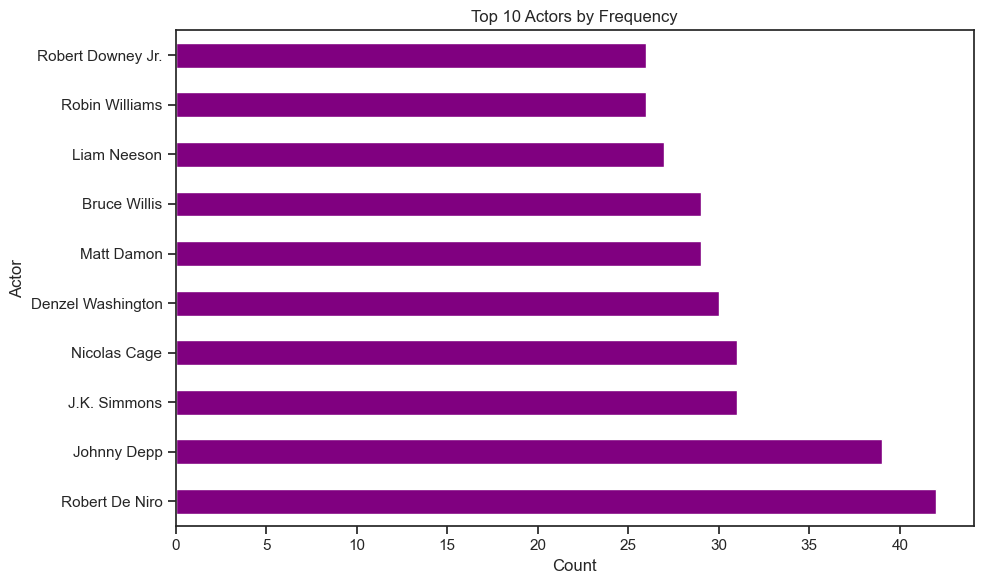

In [76]:

# Top Actors/Directors Horizontal Bar Plot
top_actors = movies_df['actor_1_name'].value_counts().head(10)
plt.figure(figsize=(10, 6))
top_actors.plot(kind='barh', color='purple')
plt.title('Top 10 Actors by Frequency')
plt.xlabel('Count')
plt.ylabel('Actor')
plt.tight_layout()
plt.show()



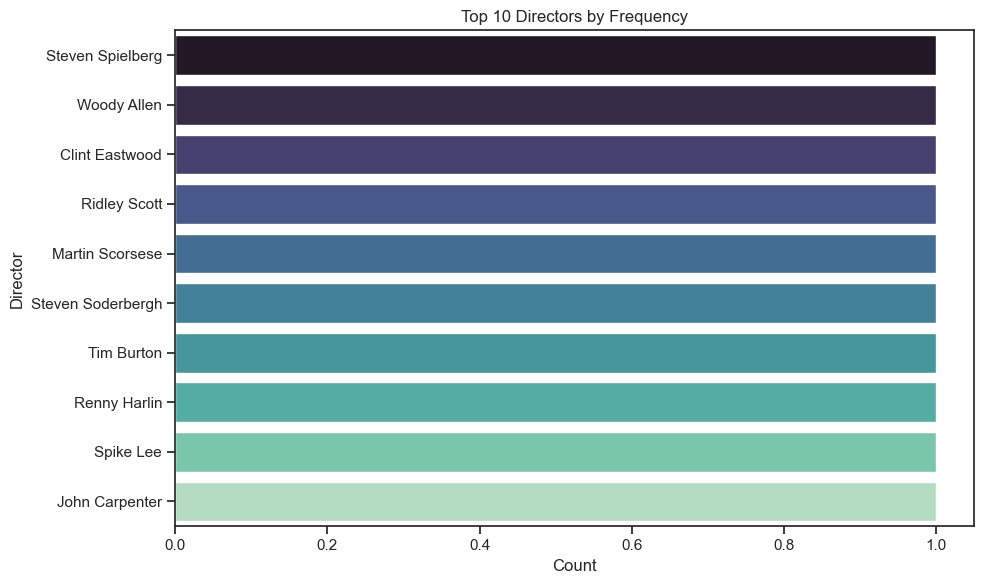

In [66]:
# Top Directors Horizontal Bar Plot
top_directors = movies_df['director_name'].value_counts().head(10)
filtered_directors = top_directors.index
plt.figure(figsize=(10, 6))
sns.countplot(y=filtered_directors, order=filtered_directors, palette='mako')
plt.title('Top 10 Directors by Frequency')
plt.xlabel('Count')
plt.ylabel('Director')
plt.tight_layout()
plt.show()

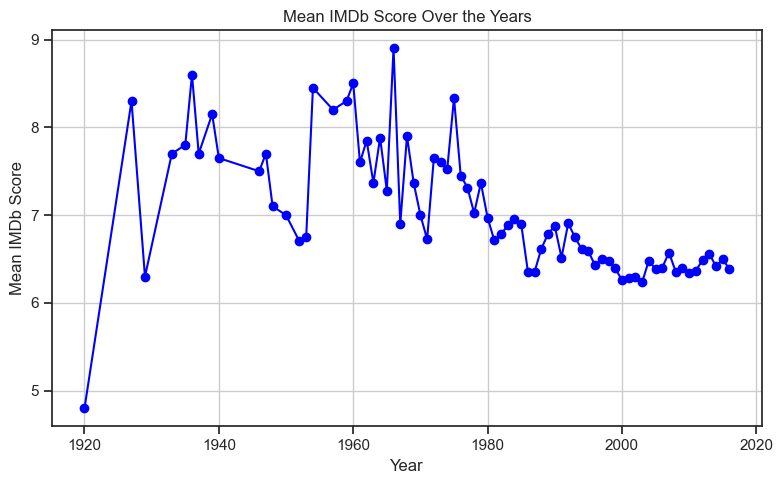

In [65]:
# Year-wise Analysis: Mean IMDb Score over the Years
mean_imdb_by_year = movies_df.groupby('title_year')['imdb_score'].mean()
plt.figure(figsize=(8, 5))
mean_imdb_by_year.plot(kind='line', marker='o', color='blue')
plt.title('Mean IMDb Score Over the Years')
plt.xlabel('Year')
plt.ylabel('Mean IMDb Score')
plt.grid(True)
plt.tight_layout()
plt.show()


Here, I've demonstrated how to create two separate line plots: one for the mean IMDb score over the years and another for the total gross earnings over the years (converted to billions for better scale). You can adjust the figure size, titles, labels, colors, and other formatting options to create visually appealing plots that effectively showcase the trends.


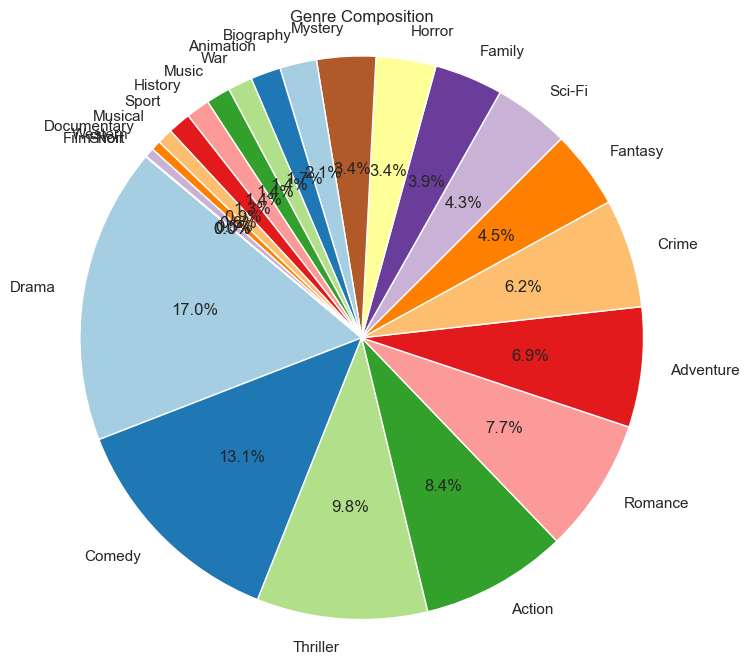

In [60]:
genre_counts = movies_df['genres'].str.split('|', expand=True).stack().value_counts()

# Create a pie chart for genre composition
plt.figure(figsize=(8, 8))
plt.pie(genre_counts, labels=genre_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Genre Composition')
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular.
plt.show()

C:\Users\nithi\AppData\Local\Temp\ipykernel_38000\143734929.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = movies_df.corr()


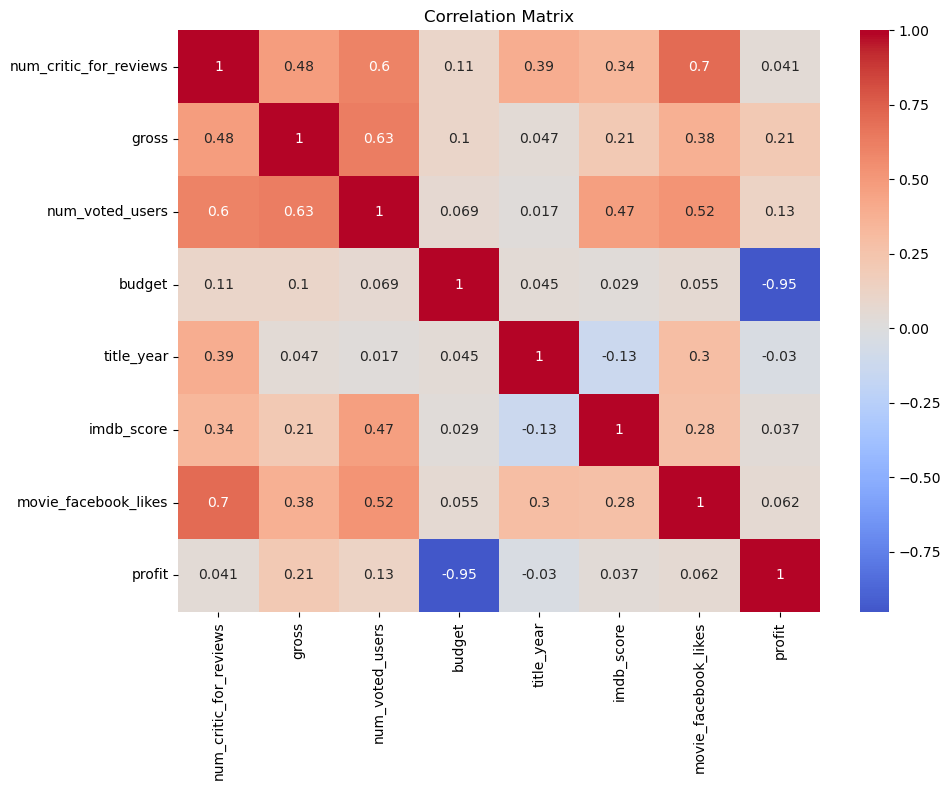

In [49]:
# Heatmap: Correlation Matrix
correlation_matrix = movies_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()
#In this code, the seaborn library is used to create the box plot, violin plot, and heatmap. Adjust the figure sizes, titles, labels, and color palettes as needed to create visually appealing plots that effectively convey your insights. These code snippets can be included in your analysis report to showcase the distribution of IMDB scores by genre and visualize the correlation between numerical variables.

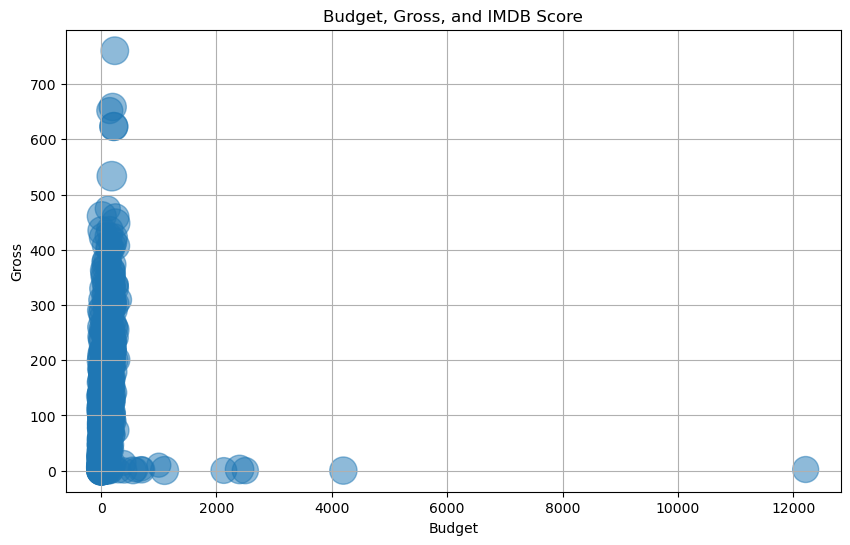

In [52]:
plt.figure(figsize=(10, 6))
plt.scatter(movies_df['budget'], movies_df['gross'], s=movies_df['imdb_score']*50, alpha=0.5)
plt.title('Budget, Gross, and IMDB Score')
plt.xlabel('Budget')
plt.ylabel('Gross')
plt.grid(True)
plt.show()

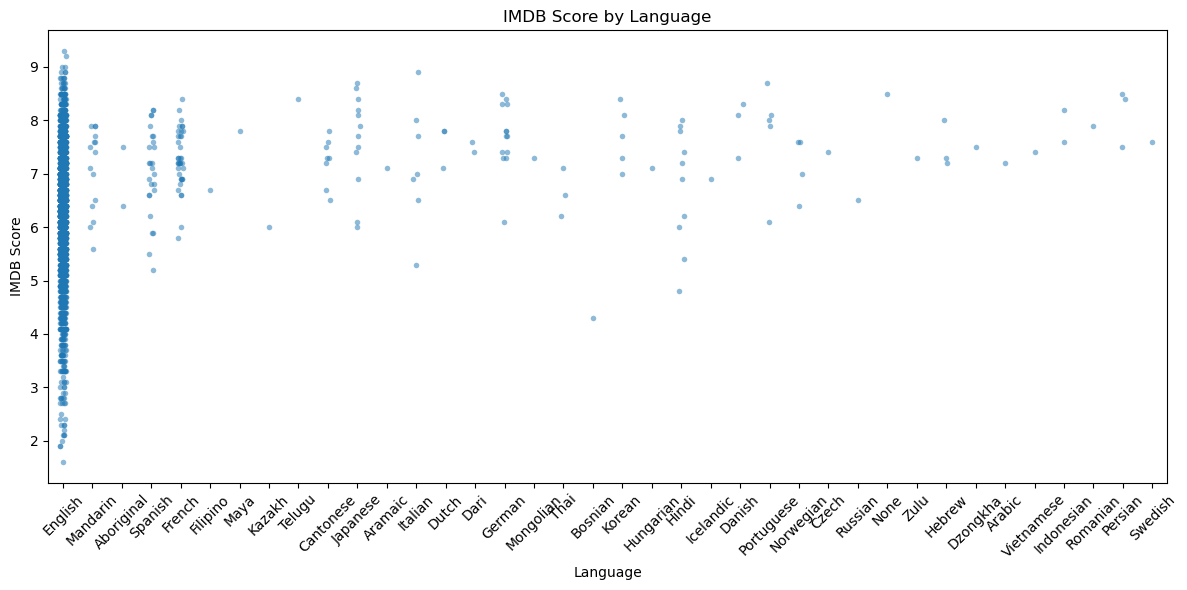

In [58]:
# Swarm Plot: IMDB Score by Language (using stripplot)
plt.figure(figsize=(12, 6))
sns.stripplot(x='language', y='imdb_score', data=movies_df, jitter=True, size=4, alpha=0.5)
plt.title('IMDB Score by Language')
plt.xlabel('Language')
plt.ylabel('IMDB Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Asking Questions 

Asking questions is a fundamental and essential aspect of data analysis. It serves as the compass guiding the exploration, understanding, and interpretation of data. By formulating insightful questions, analysts can uncover patterns, relationships, and insights that might otherwise go unnoticed. Thoughtful questioning drives the direction of analysis, aids in hypothesis formation, and helps identify variables of significance. Moreover, effective questions facilitate effective communication between analysts, stakeholders, and decision-makers, enabling data-driven insights to guide informed decisions.

#### 1. what are the top 10 Movies with profits?

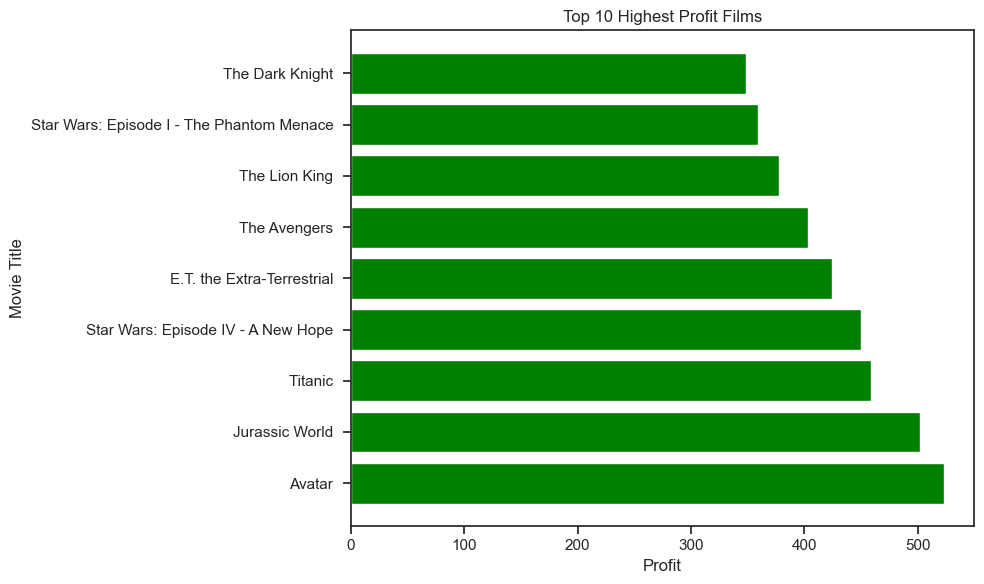

In [73]:
top_profit_films = movies_df.nlargest(10, 'profit')

# Create a bar plot of the top 10 highest profit films
plt.figure(figsize=(10, 6))
plt.barh(top_profit_films['movie_title'], top_profit_films['profit'], color='green')
plt.title('Top 10 Highest Profit Films')
plt.xlabel('Profit')
plt.ylabel('Movie Title')
plt.tight_layout()
plt.show()

> So Avatar is the movie with all time highest collections and followed by Jurassic World, titanic, ect; as showen above 

#### 2.  what is the most watched genre?

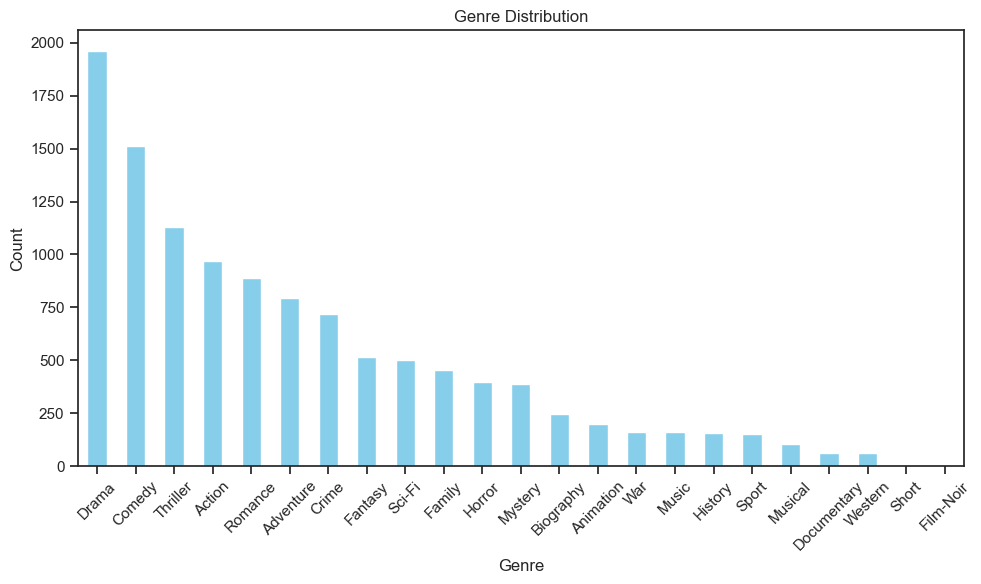

In [74]:
# Genre Distribution Bar Plot
genre_counts = movies_df['genres'].str.split('|', expand=True).stack().value_counts()
plt.figure(figsize=(10, 6))
genre_counts.plot(kind='bar', color='skyblue')
plt.title('Genre Distribution')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Most of the people like drama followed by comedy, thriller, Action and romance ect.

#### 3. what is the total gross over years?

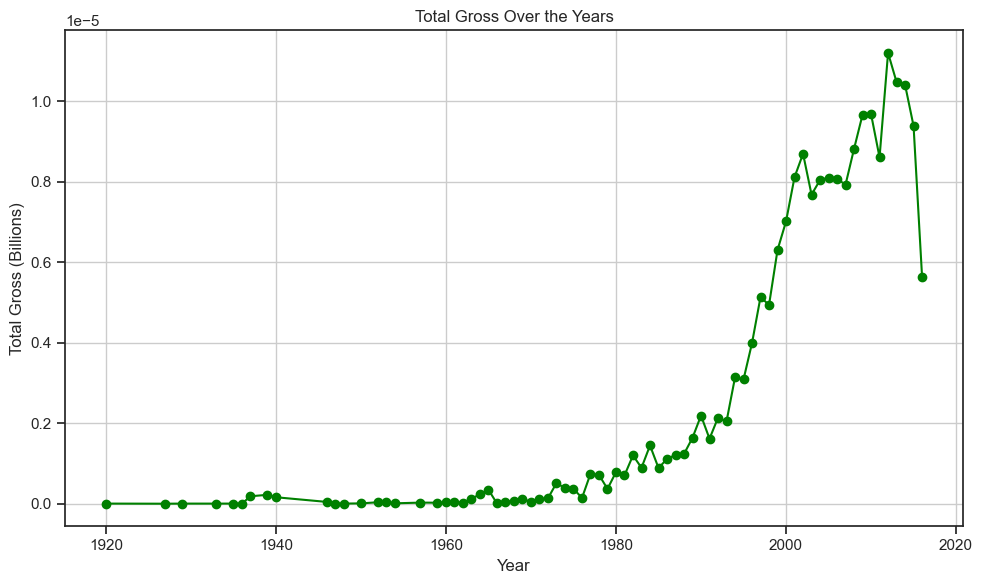

In [75]:
# Year-wise Analysis: Total Gross over the Years
total_gross_by_year = movies_df.groupby('title_year')['gross'].sum() / 1e9  # Convert to billions for better scale
plt.figure(figsize=(10, 6))
total_gross_by_year.plot(kind='line', marker='o', color='green')
plt.title('Total Gross Over the Years')
plt.xlabel('Year')
plt.ylabel('Total Gross (Billions)')
plt.grid(True)
plt.tight_layout()
plt.show()
#These code snippets can be included in your analysis report to highlight the trends of mean IMDb score and total gross earnings over the years.

#### 4. who are the Top 10 directors with most Movies?

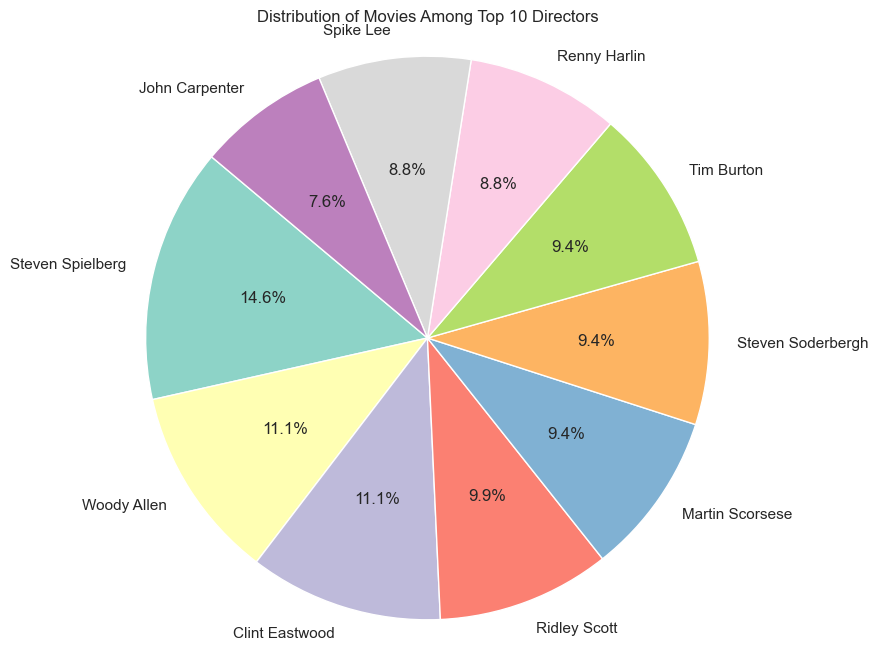

In [77]:
top_directors = movies_df['director_name'].value_counts().head(10)

# Create a pie chart for the distribution of movies among top 10 directors
plt.figure(figsize=(8, 8))
plt.pie(top_directors, labels=top_directors.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Set3.colors)
plt.title('Distribution of Movies Among Top 10 Directors')
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular.
plt.show()

#### 5. who are the top 10 directors with highest profits ?

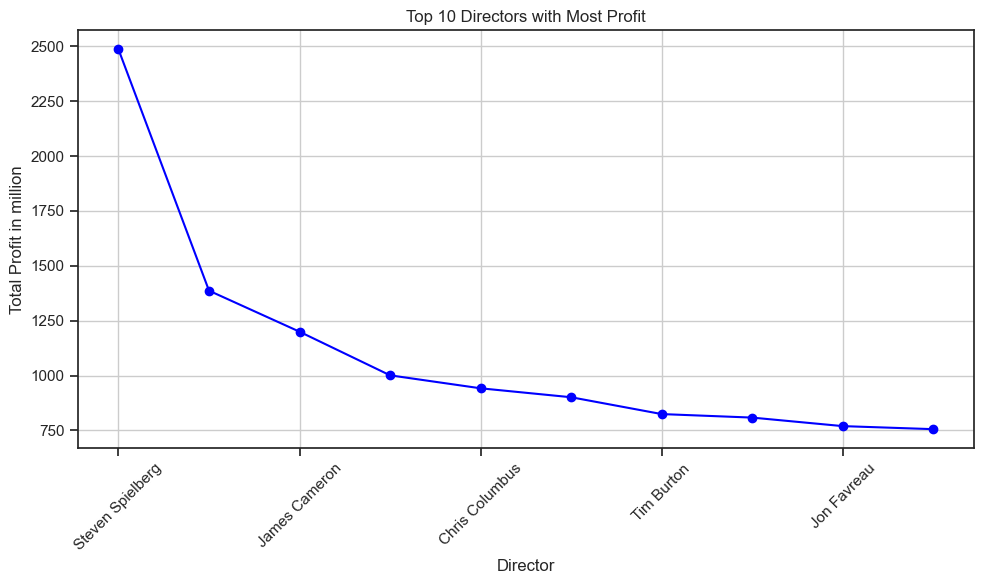

In [80]:
directors_profit = movies_df.groupby('director_name')['profit'].sum()

# Select top 10 directors with most profit
top_profit_directors = directors_profit.nlargest(10)

# Create a line chart for the top 10 directors with most profit
plt.figure(figsize=(10, 6))
top_profit_directors.plot(kind='line', marker='o', color='blue')
plt.title('Top 10 Directors with Most Profit')
plt.xlabel('Director')
plt.ylabel('Total Profit in million')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

#  Future works

![Feauture Works](https://www.ibct-global.com/ibct/wp-content/uploads/2018/12/Future_work_skills_IBCT_Blog.png)

### Predictive Analysis of IMDb Scores:
>Expand the project by developing predictive models that can forecast IMDb scores based on various movie attributes like genre, budget, director, and more. This could provide insights into what factors contribute to higher ratings.

### Genre-specific Analysis:
>Dive deeper into genre-specific trends by analyzing how different genres' popularity and IMDb scores have changed over time. This can uncover shifts in audience preferences and genre-specific success patterns.

### References

Imbd Data set: https://drive.google.com/file/d/1XpGThHzLnXxL_7aQo2sCpYL3SeB18MMB/view

Trainity Tutorials for Exploratory Data Analysis https://trainity.in

Kaggle Datasets (Choose Dataset of your choice): https://www.kaggle.com/datasets

Pandas user guide: https://pandas.pydata.org/docs/user_guide/index.html

Matplotlib user guide: https://matplotlib.org/3.3.1/users/index.html

Seaborn user guide & tutorial: https://seaborn.pydata.org/tutorial.html

Data analysis guide(https://jovian.ml/aakashns/python-pandas-data-analysis)

Jovian Forum (Ask Questions in this great community): https://jovian.ml/forum/

Stackoverflow Community (Get answers of any problems): https://stackoverflow.com/questions

Python solutions in Geeksforgeeks (Solutions made easy): https://www.geeksforgeeks.org/python-programming-language/

![Thank you](https://assets-in.bmscdn.com/discovery-catalog/events/et00318311-nzkturpjdn-landscape.jpg)

In [82]:
import jovian
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "nithinmodiboyana/imdb-movie-analysis" on https://jovian.com/
[jovian] Committed successfully! https://jovian.com/nithinmodiboyana/imdb-movie-analysis


'https://jovian.com/nithinmodiboyana/imdb-movie-analysis'